## Verifying Pólya urn model limiting distribution is a beta

Let's start with writing a `run_polya_urn` function that simulates polya urn run for `N` steps and outputs number of balls in each category.

In [1]:
import random

def run_polya_urn(a, b, N):
    for i in range(N):
        x = random.randrange(a + b)
        if x < a:
            a, b = a + 1, b
        else:
            a, b = a, b + 1
    return a, b

Now let's take a look at what we get.

In [2]:
for i in range(3):
    x, y = run_polya_urn(2, 3, 20000)
    print("{:6}, {:6}, {:6.2f}".format(x, y, x / (x + y)))

  5298,  14707,   0.26
 10664,   9341,   0.53
 10616,   9389,   0.53


Now let's write a function that outomatically will give us ratios of the first category after `Nlim` iteratios, and reapeat the whole process for `Nratios` times.

In [3]:
def generate_ratios(a, b, Nratios, Nlim):
    runs = (run_polya_urn(a, b, Nlim) for _ in range(Nratios))
    return [1. * a_n / (a_n + b_n) for a_n, b_n in runs]

Now let's plot the histogram of what we get, for `a, b = 2, 4` (chosen arbitrarily for demonstration)

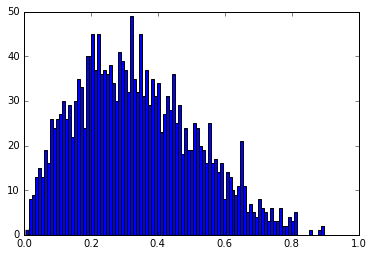

In [4]:
%matplotlib inline

import matplotlib.pyplot as pyplot

a, b = 2, 4

ratios = generate_ratios(a, b, 2000, 2000)
n, bins, patches = pyplot.hist(ratios, bins=100)
_ = pyplot.xlim(0, 1)

If you are familiar with beta distributions you could probably see similarity, but if you are not let's plot `Beta(2, 4)` on top of the histagram.

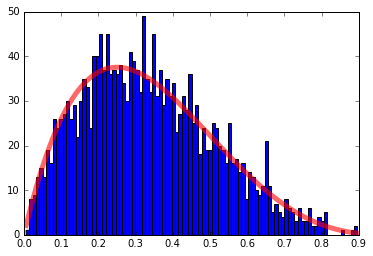

In [5]:
from scipy.stats import beta
import numpy as np

w = bins[1] - bins[0]
n, bins, patches = pyplot.hist(ratios, bins=100)
_ = pyplot.plot(bins, len(ratios) * w * beta.pdf(bins, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')

It's pretty close to Beta distribution if you ask me, considering we only ran each ploy urn for only `2000` iterations.